# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# Описание проекта.
1. Загрузим и изучим данные. При необходимости проведем предобработку данных.
2. Признаки умножают на обратимую матрицу. Проверим, изменится ли качество линейной регрессии? 
3. Предложим алгоритм преобразования данных для решения задачи. 
4. Запрограммируем этот алгоритм, применив матричные операции. Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Для проверки применим метрику R2.

Описание данных

Набор данных находится в файле /datasets/insurance.csv. \
Скачать датасет.\
Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.\
Целевой признак: количество страховых выплат клиенту за последние 5 лет.


## Загрузка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

state = np.random.RandomState(12345)


In [2]:
basic_df = pd.read_csv('insurance.csv')

In [3]:
basic_df.shape
print('Количество стобцов:', basic_df.shape[1])
print('Количество строк:', basic_df.shape[0])
print('Количество дупликатов', basic_df.duplicated().sum())
display(basic_df.head())
display(basic_df.describe())
basic_df.info()

Количество стобцов: 5
Количество строк: 5000
Количество дупликатов 153


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
print('Количество пропусков')
basic_df.isna().sum()

Количество пропусков


Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [5]:
# В принципе, в данных нет признаков которые 
# могли бы явно идентифицировать клиента, 
# скорее всего просто совпадение данных. 
# В общем, можно сказать, что в этом проекте EDA второстепенен.
# Оставим так как есть
# Удалим дубликаты из данных
# basic_df = basic_df.drop_duplicates(keep='first')
# basic_df.reset_index(drop= True , inplace= True )

In [6]:
# print('Количество дупликатов', basic_df.duplicated().sum())

Преобразуем данные столбцов "Зарплата" и "Возраст" в целочисленные 

In [7]:
basic_df['Зарплата'] = basic_df['Зарплата'].astype('int')
basic_df['Возраст'] = basic_df['Возраст'].astype('int')

In [8]:
basic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int32
 2   Зарплата           5000 non-null   int32
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int32(2), int64(3)
memory usage: 156.4 KB


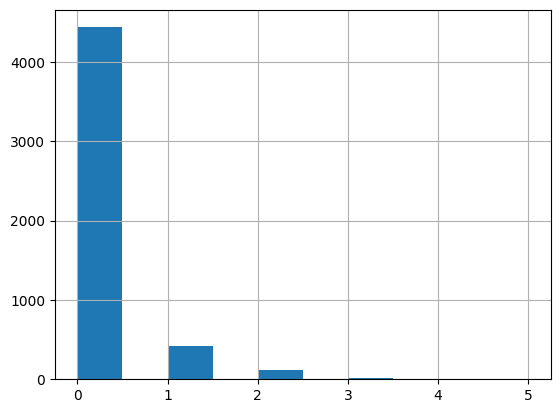

In [9]:
basic_df['Страховые выплаты'].hist()
plt.show()

Данные загружены и изучены. Проведена подготовка данных для выполнения задания. Аномалий не выявлено.

## Признаки умножаем на обратимую матрицу. Изменится ли качество линейной регрессии? 

In [10]:
# Создадим функцию по расчету r2 для матрицы признаков и измененной матрицы
def r2_score_train(x, y):
    model = LinearRegression()
    model.fit(x, y)
    r2 = model.score(x, y)
    return r2

In [11]:
# Выделим признаки и целевой признак
X = basic_df.drop('Страховые выплаты',axis=1)
y = basic_df['Страховые выплаты']
X.shape, y.shape

((5000, 4), (5000,))

In [12]:
# Вычислим r2 для матрицы признаков
r2_score_original = r2_score_train(X, y)

Необратимые матрицы встречаются редко. Если сгенерировать случайную матрицу, вероятность получить необратимую матрицу близка к нулю. Однако проверим сгенерируемую матрицу на обратимость, т.к. в случае необратимости мы не сможем произвести обратное преобразование (дешифровку). Для того чтобы квадратная матрица А порядка n имела обратную, необходимо и достаточно, чтобы детерминант (определитель матрицы) detА ≠ 0.

In [13]:
# Создадим случайную обратимую матрицу, проверим ее на обратимость
while True:
    random_matrix = np.random.randint(1, 100, size = (4, 4))
    determinant = np.linalg.det(random_matrix)

    if determinant == 0:
        continue
    else:
        print('Матрица обратима, можем продолжать исследование')
        break        

Матрица обратима, можем продолжать исследование


In [14]:
random_matrix

array([[41, 96, 41, 80],
       [89, 53, 50, 42],
       [45, 65, 65, 54],
       [86, 29, 76, 83]])

In [15]:
# Дополнительная проверка обратимости матрицы.
# В случае вырожденной матрицы код будет падать с ошибкой LinAlgError: Singular matrix.
np.linalg.inv(random_matrix)

array([[-0.00045265,  0.01810818, -0.01437597,  0.00062615],
       [ 0.00592982,  0.0071457 ,  0.00699345, -0.01388134],
       [-0.01790606, -0.00844349,  0.03342706, -0.00021626],
       [ 0.01479306, -0.01352799, -0.01815582,  0.01644754]])

In [16]:
X_inv = X @ random_matrix

In [17]:
# Вычислим r2 для получившийся матрицы
r2_score_change = r2_score_train(X_inv, y)

In [18]:
r2_score_data = pd.DataFrame(data=[r2_score_change, r2_score_original], 
                             columns=['Метрика r2'], 
                             index=['Оригинальные данные', 
                                    'Измененные данные']
                            )
r2_score_data

,Метрика r2
Оригинальные данные,0.424946
Измененные данные,0.424946


Как видно, значение предсказания линейной регрессии не меняется, если умножать матрицу признаков на обратимую матрицу.

## Предложим алгоритм преобразования данных для решения задачи. 

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Для защиты данных клиентов предложим преобразовать матрицу признаков - умножить ее на случайную матрицу.

**Обоснование:**   

Предположим, что измененная матрица $X_1 = XP$

Тогда $w_1 = (X_1^TX_1)^{-1} X_1^Ty = ((XP)^T(XP))^{-1} (XP)^Ty = P^{-1}((XP)^{T}X)^{-1} (XP)^Ty =$

$= P^{-1}((XP)^{T}X)^{-1} P^TX^Ty = P^{-1}(P^TX^TX)^{-1} P^TX^Ty =$

$= P^{-1}(X^TX)^{-1}(P^T)^{-1} P^TX^Ty$

Сократим $(P^{T})^{-1} P^T $  

$w_1 = P^{-1}(X^TX)^{-1} X^Ty$


Подставим для $X_1$ и $w_1$ в формулу для расчета $a_1$:

$a_1=X_1P^{-1}(X^TX)^{-1} X^Ty$

$(X^TX)^{-1} X^Ty = w$   
 
Окончательно формула выглядит так: $ a_1 = XPP^{-1}w = Xw = a$

Таким образом, мы видим, что после умножения выражения равны.

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
....
$$
$$
....
$$

## Алгоритм преобразования

**Алгоритм**

1. Создание отдельных переменных с признаками и целевым признаком
2. Обучение модели без преобразования
3. Получение метрики R2 на модели без преобразования
4. Создание случайной матрицы
5. Умножение случайной матрицы на матрицу признаков
6. Обучение модели на преобразованых данных
7. Получение метрики R2 на преобразованых данных

**Обоснование**
Умножим нашу матрицу признаков на случайную матрицу и сравним значения метрики r2

## Проверка алгоритма

In [19]:
# Создаем отдельные переменные для признаков и целевого признака
features = basic_df.drop('Страховые выплаты', axis=1)
target = basic_df['Страховые выплаты']

In [20]:
# Делим выборку
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size=0.4, random_state=state)

In [21]:
# Получаем предсказания для оригинальной выборки
model = LinearRegression().fit(features_train, target_train)
predictions = model.predict(features_test)

In [22]:
# Вычисляем метрику r2 для оригинальной выборки
r2_score_original_test = r2_score(target_test, predictions)

In [23]:
# Создадим случайную обратимую матрицу, проверим ее на обратимость
while True:
    random_matrix_test = np.random.randint(1, 100, size = (4, 4))
    determinant = np.linalg.det(random_matrix_test)

    if determinant == 0:
        continue
    else:
        print('Матрица обратима, можем продолжать проверку алгоритма')
        break        

Матрица обратима, можем продолжать проверку алгоритма


In [24]:
random_matrix_test

array([[47, 17, 91, 85],
       [83, 80,  6, 30],
       [10, 31, 79, 12],
       [23, 10, 59, 20]])

In [25]:
# Дополнительная проверка обратимости матрицы.
# В случае вырожденной матрицы код будет падать с ошибкой LinAlgError: Singular matrix.
np.linalg.inv(random_matrix_test)

array([[-0.01123761,  0.00661416, -0.02865917,  0.05503409],
       [ 0.00413358,  0.00647141,  0.02739059, -0.04370916],
       [-0.00334959, -0.00313421,  0.00473235,  0.01609767],
       [ 0.02073776, -0.00159608,  0.00530232, -0.03892276]])

In [26]:
features_inv = features @ random_matrix_test

In [27]:
# Делим выборку с измененными признаками
features_train_inv, features_test_inv, target_train_inv, target_test_inv = train_test_split(features_inv, target,
                                                                            test_size=0.4, random_state=12345)

In [28]:
# Получаем предсказания для измененной выборки
model = LinearRegression().fit(features_train_inv, target_train_inv)
predictions = model.predict(features_test_inv)

In [29]:
# Вычисляем метрику r2 для измененной выборки
r2_score_change_test = r2_score(target_test_inv, predictions)

In [30]:
r2_score_data = pd.DataFrame(data=[r2_score_change_test, r2_score_original_test], 
                             columns=['Метрика r2'], 
                             index=['Оригинальные данные', 
                                    'Измененные данные']
                            )
r2_score_data

,Метрика r2
Оригинальные данные,0.423752
Измененные данные,0.423752


Мы видим, что метрика r2 не изменилась при умножении матриц

Общий вывод по проекту:
1. Загрузили и изучили данные.
2. Умножили признаки на обратимую матрицу. Качество линейной регрессии при умножении не изменилось.
3. В качестве алгоритма преобразования данных для защиты данных клиентов страховой компании «Хоть потоп» предложили умножение матрицы признаков на случайную обратимую матрицу.
3. Запрограммировали этот алгоритм, применив матричные операции. 
5. Убедились, что качество линейной регрессии не отличается до и после преобразования. Для проверки применили метрику R2.
6. Таким образом, с матрицами признаков можно выполнять любые опреации без потери качества линейной регрессии.